<a href="https://colab.research.google.com/github/sharan6422/Nuerofeedback-device/blob/main/Machine%20learning%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
py.offline.init_notebook_mode(connected=True)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
from google.colab import files
uploaded = files.upload()

# After uploading, read the file (adjust the filename accordingly)
df = pd.read_csv('Adult_Final.csv')

# Display the DataFrame (optional)
df.head()


Saving Adult_Final.csv to Adult_Final (1).csv


,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Decribing the dataset

In [86]:
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
# Get the number of attributes (columns)
num_attributes = df.shape[1]

# Get the number of instances (rows)
num_instances = df.shape[0]

# Print the results
print("Number of attributes:", num_attributes)
print("Number of instances:", num_instances)

Number of attributes: 15
Number of instances: 32561


## Plotting histogram

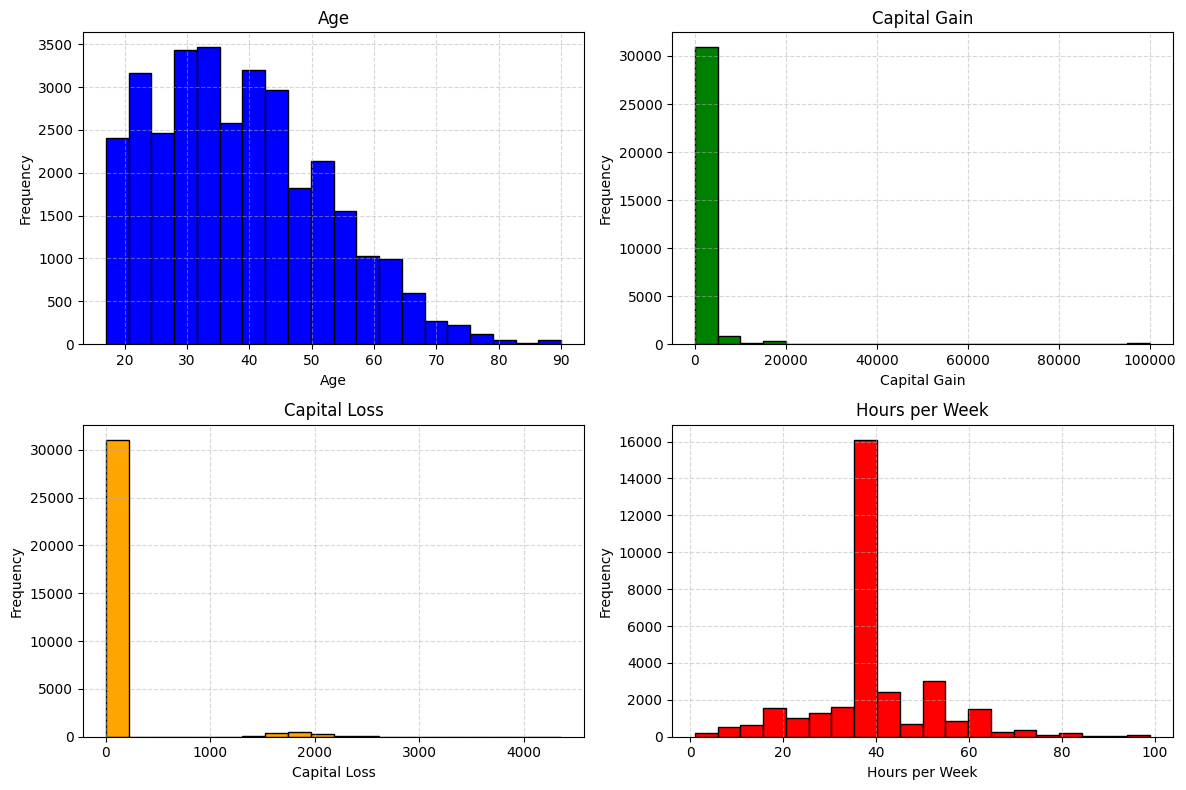

In [89]:
# UPDATED

import matplotlib.pyplot as plt

# Create subplots for the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Set a common color palette for all histograms
colors = ['blue', 'green', 'orange', 'red']

# Set common bin edges for all histograms
bins = 20

# Plot histogram for age
axes[0, 0].hist(df['Age'], bins=bins, color=colors[0], edgecolor='black')
axes[0, 0].set_title('Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Plot histogram for capital gain
axes[0, 1].hist(df['Capital_gain'], bins=bins, color=colors[1], edgecolor='black')
axes[0, 1].set_title('Capital Gain')
axes[0, 1].set_xlabel('Capital Gain')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Plot histogram for capital loss
axes[1, 0].hist(df['Capital_loss'], bins=bins, color=colors[2], edgecolor='black')
axes[1, 0].set_title('Capital Loss')
axes[1, 0].set_xlabel('Capital Loss')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Plot histogram for hours per week
axes[1, 1].hist(df['Hours_per_week'], bins=bins, color=colors[3], edgecolor='black')
axes[1, 1].set_title('Hours per Week')
axes[1, 1].set_xlabel('Hours per Week')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


<ipython-input-90-4bc566baef7e>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-90-4bc566baef7e>:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



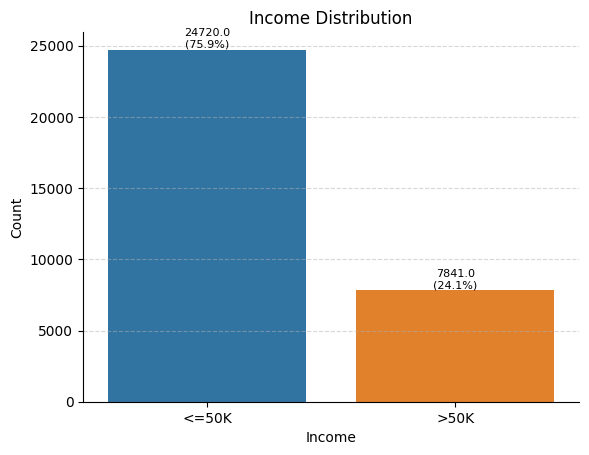

In [90]:
# UPDATED

import seaborn as sns
import matplotlib.pyplot as plt

# Convert "Income" column to categorical data type
df["Income"] = df["Income"].astype("category")

# Set a custom color palette
color_palette = ["#1f77b4", "#ff7f0e"]

# Plot the count of each category
ax = sns.countplot(data=df, x="Income", palette=color_palette)

# Set plot title and labels
ax.set_title("Income Distribution")
ax.set_xlabel("Income")
ax.set_ylabel("Count")

# Customize the tick labels
ax.set_xticklabels(["<=50K", ">50K"])

# Remove the spines (borders) of the plot
sns.despine()

# Add grid lines
ax.grid(True, axis="y", linestyle="--", alpha=0.5)

# Add data labels
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}\n({height / total_count:.1%})", (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", fontsize=8)

# Adjust spacing between bars and title
plt.subplots_adjust(top=0.88)

# Show the plot
plt.show()

## Handling missing values and NaNs

In [91]:
numeric_describe = df.describe().T
numeric_describe

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [92]:
df.isnull().sum()

,0
Age,0
WorkClass,0
Fnlwgt,0
Education,0
Education_num,0
Marital_Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [93]:
# UPDATED
unique_countries = df['Native_Country'].unique()
unique_countries

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [94]:
unique_occ = df['Occupation'].unique()
unique_occ

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [95]:
# UPDATED
filtered_df = df.loc[df['Native_Country'] == ' ?']
filtered_df

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [96]:
# UPDATED
filtered_df = df.loc[df['Occupation'] == ' ?']
filtered_df

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [97]:
# UPDATED
df.drop(df[(df['Native_Country'] == ' ?') & (df['Occupation'] == ' ?')].index, inplace=True)
df

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Plotting bar graph

<ipython-input-98-10530aa0c10c>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



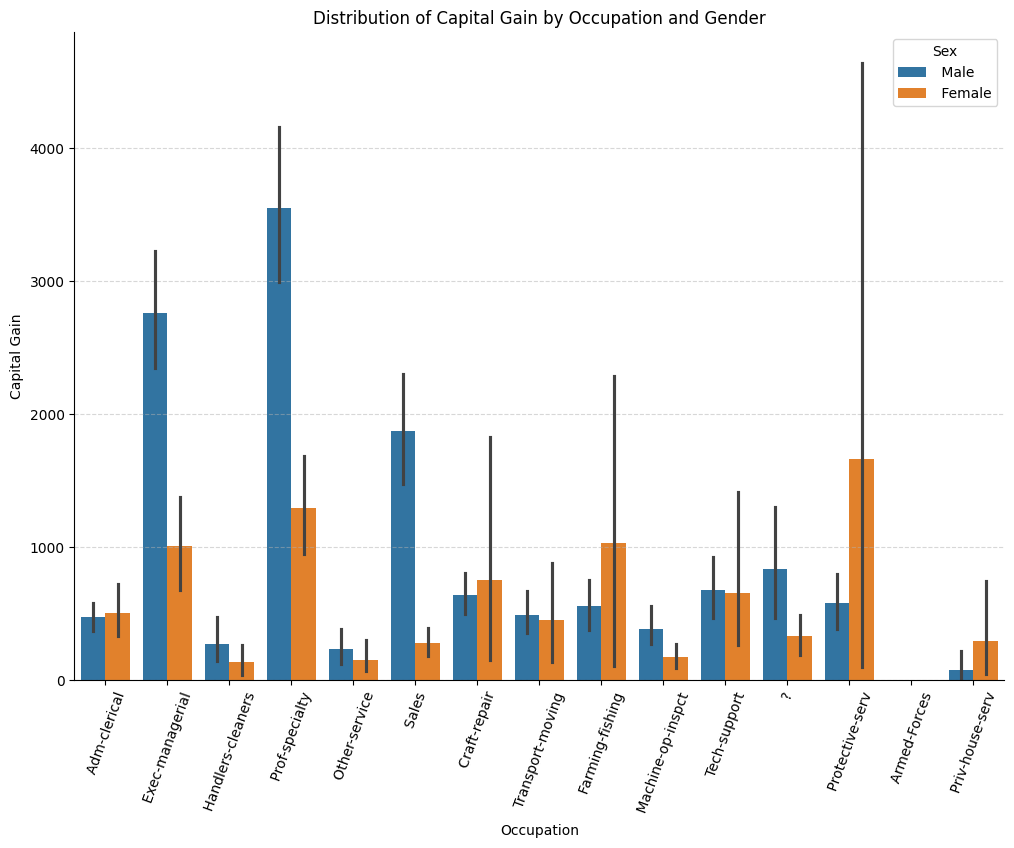

In [98]:
# UPDATED
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 8))

# Customize color palette
colors = ['#1f77b4', '#ff7f0e']

# Create the bar plot
ax = sns.barplot(x='Occupation', y='Capital_gain', data=df, hue='Sex', palette=colors)

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Set plot title and labels
ax.set_title('Distribution of Capital Gain by Occupation and Gender')
ax.set_xlabel('Occupation')
ax.set_ylabel('Capital Gain')

# Set legend title and labels
ax.legend(title='Sex', loc='upper right')

# Remove top and right spines
sns.despine()

# Add grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust spacing between bars and title
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()


<ipython-input-99-be8e6aded0d1>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



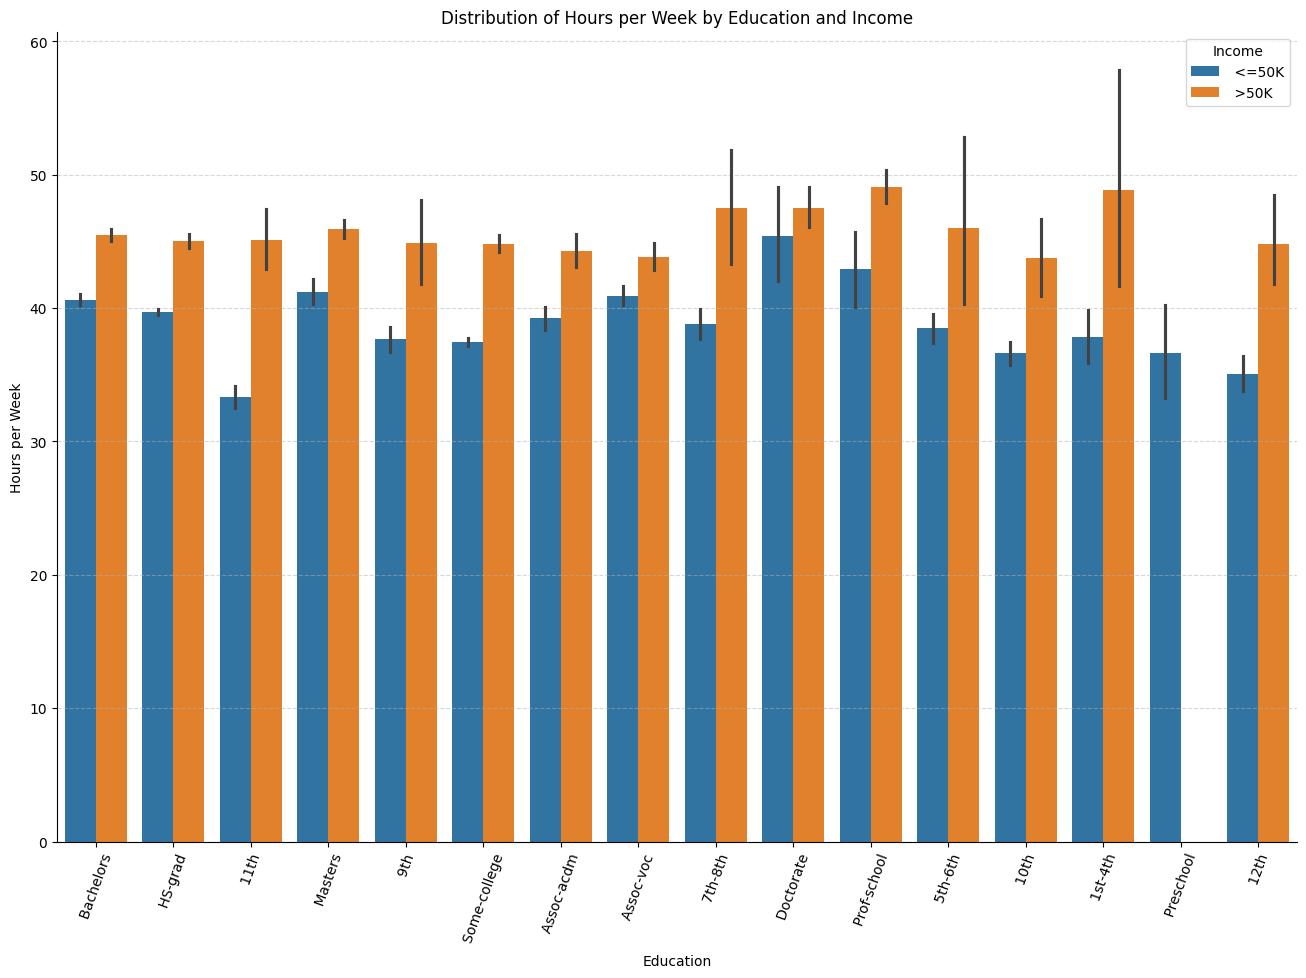

In [99]:
# UPDATED
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(16, 10))

# Customize color palette
colors = ['#1f77b4', '#ff7f0e']

# Create the bar plot
ax = sns.barplot(x='Education', y='Hours_per_week', data=df, hue='Income', palette=colors)

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Set plot title and labels
ax.set_title('Distribution of Hours per Week by Education and Income')
ax.set_xlabel('Education')
ax.set_ylabel('Hours per Week')

# Set legend title and labels
ax.legend(title='Income', loc='upper right')

# Remove top and right spines
sns.despine()

# Add grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust spacing between bars and title
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()


In [100]:
# UPDATED

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Income' column
df['Income'] = label_encoder.fit_transform(df['Income'])

# Encode the 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Perform one-hot encoding on the entire DataFrame
df = pd.get_dummies(df, drop_first=True)

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns',100)

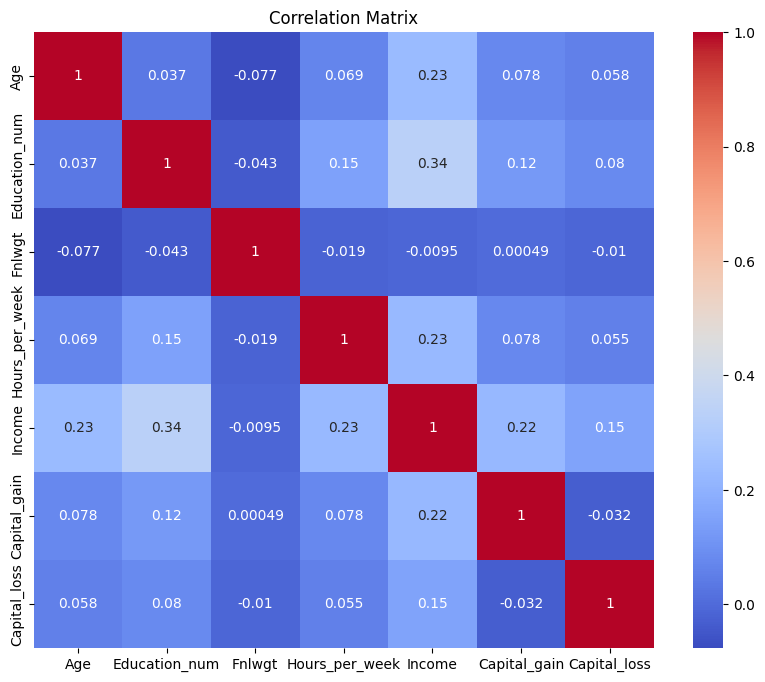

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant features for correlation analysis
selected_features = ['Age','Education_num', 'Fnlwgt', 'Hours_per_week', 'Income','Capital_gain', 'Capital_loss']
df_selected = df[selected_features]  # Remove the square brackets here

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scaling and encoding features

In [102]:
# UPDATED

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled
cols_to_scale = ['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

# Scale the selected columns
scaled_cols = scaler.fit_transform(df[cols_to_scale])

# Create a DataFrame from the scaled columns
scaled_df = pd.DataFrame(scaled_cols, columns=cols_to_scale)

# Update the original DataFrame with the scaled values
df[cols_to_scale] = scaled_df

## Splitting data into train and test data

In [103]:
# UPDATED

# Separate the features (X) and the target variable (y)
X = df.drop(['Income'], axis=1)
y = df['Income']

# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train and y_train will be the training data, X_test and y_test will be the testing data
# test_size=0.30 means that 30% of the data will be used for testing and 70% for training
# random_state=11 sets a specific random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)


In [104]:
# Import the necessary classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Create instances of the classifier models
lr = LogisticRegression() # Logistic Regression
knn = KNeighborsClassifier() # KNearest Neighbors
dt = DecisionTreeClassifier() # Decision Tree
rf = RandomForestClassifier() # Random Forest
adb = AdaBoostClassifier() # Adaboost Classifier
svm = SVC() # Support Vector Classifier
gdboost = GradientBoostingClassifier() # Gradient Boosting Classifier
xgboost = XGBClassifier() # XGBoost Classifier

# Print a message to indicate that the models are created
print("Models are created")


Models are created


In [105]:
# UPDATED
from sklearn.impute import SimpleImputer
# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to your training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)
# Impute missing values in X
X_imputed = imputer.fit_transform(X)
# Apply absolute value transformation to ensure non-negative values
X_imputed = np.abs(X_imputed)
X_test_imputed = imputer.fit_transform(X_test)


Top 15 features by Chi-squared statistics:
Capital_gain: 82161586.51660648
Capital_loss: 1375311.4396150731
Marital_Status_ Married-civ-spouse: 3472.8987160843835
Marital_Status_ Never-married: 2217.037640074957
Relationship_ Own-child: 1435.2648473924041
Occupation_ Exec-managerial: 1314.3643169707489
Occupation_ Prof-specialty: 980.8961451280487
Education_ Masters: 940.4906065205287
Education_ Bachelors: 885.8200651002686
Relationship_ Not-in-family: 860.0291653133082
Education_ Prof-school: 769.7468468125123
Occupation_ Other-service: 715.7924314256488
WorkClass_ Self-emp-inc: 611.2038026761645
Relationship_ Unmarried: 593.6835912388557
Education_ Doctorate: 564.7150635263399


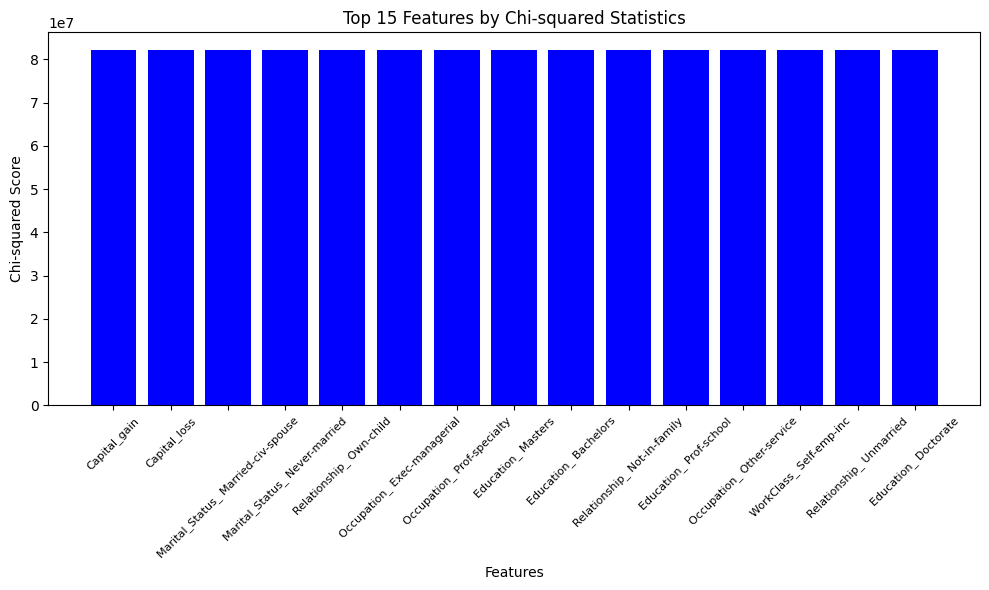

In [106]:
# UPDATED

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Perform feature selection using chi-squared test

k = 15  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_imputed, y)

# Get the chi-squared scores and corresponding feature names
scores = selector.scores_
feature_names = X.columns

# Create a dictionary to store feature names and their corresponding chi-squared scores
feature_scores = dict(zip(feature_names, scores))

# Sort the features based on their chi-squared scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top k features and their chi-squared scores
print(f"Top {k} features by Chi-squared statistics:")
for feature, score in sorted_features[:k]:
    print(f"{feature}: {score}")

plt.figure(figsize=(10, 6))
for feature, score in sorted_features[:k]:
  plt.bar(feature, scores, color='blue')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.title(f'Top {k} Features by Chi-squared Statistics')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()


## Creating and training models

In [107]:
# UPDATED

# Import the necessary classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Create instances of the classifier models
lr = LogisticRegression()  # Logistic Regression
knn = KNeighborsClassifier()  # KNearest Neighbors
dt = DecisionTreeClassifier()  # Decision Tree
rf = RandomForestClassifier()  # Random Forest
adb = AdaBoostClassifier()  # Adaboost Classifier
svm = SVC()  # Support Vector Classifier
gdboost = GradientBoostingClassifier()  # Gradient Boosting Classifier
xgboost = XGBClassifier()  # XGBoost Classifier

# Print a message to indicate that the models are created
print("Models are created")

Models are created


In [108]:
from sklearn.metrics import r2_score

lr.fit(X_train_imputed, y_train)
prediction = lr.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for LR: ", r2)

knn.fit(X_train_imputed,y_train)
prediction = knn.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for KNN: ", r2)

dt.fit(X_train_imputed,y_train)
prediction = dt.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for DR: ", r2)

rf.fit(X_train_imputed,y_train)
prediction = rf.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for RF: ", r2)

adb.fit(X_train_imputed,y_train)
prediction = adb.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for ADB: ", r2)

svm.fit(X_train_imputed,y_train)
prediction = svm.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for SVM: ", r2)

gdboost.fit(X_train_imputed,y_train)
prediction = gdboost.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for GDBoost: ", r2)

xgboost.fit(X_train_imputed,y_train)
prediction = xgboost.predict(X_test_imputed)
r2 = r2_score(y_test, prediction)
print("R2 for XGBoost: ", r2)

print("\nModels are trained")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



R2 for LR:  0.1586505309612466
R2 for KNN:  0.17239807130501705
R2 for DR:  -0.06845883551784171
R2 for RF:  0.19164462778629576
R2 for ADB:  0.15645092450624332
R2 for SVM:  -0.08825529361287132
R2 for GDBoost:  0.22408882299759403
R2 for XGBoost:  0.2647815424151547

Models are trained


In [109]:
print("Lr classification score",lr.score(X_train_imputed,y_train))
print("knn classification score",knn.score(X_train_imputed,y_train))
print("dt classification score",dt.score(X_train_imputed,y_train))
print("rf classification score",rf.score(X_train_imputed,y_train))
print("adb classification score",adb.score(X_train_imputed,y_train))
print("svm classification score",svm.score(X_train_imputed,y_train))
print("gdboost classification score",gdboost.score(X_train_imputed,y_train))
print("xgboost classification score",xgboost.score(X_train_imputed,y_train))

Lr classification score 0.8469239889342642
knn classification score 0.8912308435427919
dt classification score 0.9999560883502393
rf classification score 0.9999560883502393
adb classification score 0.8496465112194265
svm classification score 0.8048127168137706
gdboost classification score 0.863917797391648
xgboost classification score 0.9022526676327229


In [110]:
# from sklearn.impute import SimpleImputer

# # Create an instance of the imputer with the desired strategy (e.g., mean, median, etc.)
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer on the training data
# imputer.fit(X_train)

# # Transform the training and test data using the fitted imputer
# X_train_imputed = imputer.transform(X_train)

X_test_imputed = imputer.transform(X_test)

In [36]:
lr_yprad = lr.predict(X_test_imputed)
knn_yprad = knn.predict(X_test_imputed)
dt_yprad = dt.predict(X_test_imputed)
rf_yprad = rf.predict(X_test_imputed)
adb_yprad = adb.predict(X_test_imputed)
svm_yprad = svm.predict(X_test_imputed)
gdboost_yprad = gdboost.predict(X_test_imputed)
xgboost_yprad = xgboost.predict(X_test_imputed)

## Confusion matrix

In [111]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6883  461]
 [1069 1348]]


In [112]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[6754  590]
 [ 915 1502]]


In [113]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[6349  995]
 [ 952 1465]]


In [114]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for rf_model",'\n',rf_conf_mat)

confusion matrix for rf_model 
 [[6871  473]
 [ 994 1423]]


In [115]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for adb_model",'\n',adb_conf_mat)

confusion matrix for adb_model 
 [[6980  364]
 [1170 1247]]


In [116]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[7119  225]
 [1754  663]]


In [117]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[6999  345]
 [1066 1351]]


In [118]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6925  419]
 [ 918 1499]]


## Classification reports

In [119]:
from sklearn.metrics import classification_report

# Logistic Regression
lr_report = classification_report(y_test, lr_yprad)
print("Logistic Regression Classification Report:")
print(lr_report)
print()

# K-Nearest Neighbors
knn_report = classification_report(y_test, knn_yprad)
print("K-Nearest Neighbors Classification Report:")
print(knn_report)
print()

# Decision Tree
dt_report = classification_report(y_test, dt_yprad)
print("Decision Tree Classification Report:")
print(dt_report)
print()

# Random Forest
rf_report = classification_report(y_test, rf_yprad)
print("Random Forest Classification Report:")
print(rf_report)
print()

# AdaBoost
adb_report = classification_report(y_test, adb_yprad)
print("AdaBoost Classification Report:")
print(adb_report)
print()

# Support Vector Machine
svm_report = classification_report(y_test, svm_yprad)
print("Support Vector Machine Classification Report:")
print(svm_report)
print()

# Gradient Boosting
gdboost_report = classification_report(y_test, gdboost_yprad)
print("Gradient Boosting Classification Report:")
print(gdboost_report)
print()

# XGBoost
xgboost_report = classification_report(y_test, xgboost_yprad)
print("XGBoost Classification Report:")
print(xgboost_report)
print()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7344
           1       0.75      0.56      0.64      2417

    accuracy                           0.84      9761
   macro avg       0.81      0.75      0.77      9761
weighted avg       0.84      0.84      0.84      9761


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7344
           1       0.72      0.62      0.67      2417

    accuracy                           0.85      9761
   macro avg       0.80      0.77      0.78      9761
weighted avg       0.84      0.85      0.84      9761


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7344
           1       0.60      0.61      0.60      2417

    accuracy                           0.80      9761
   

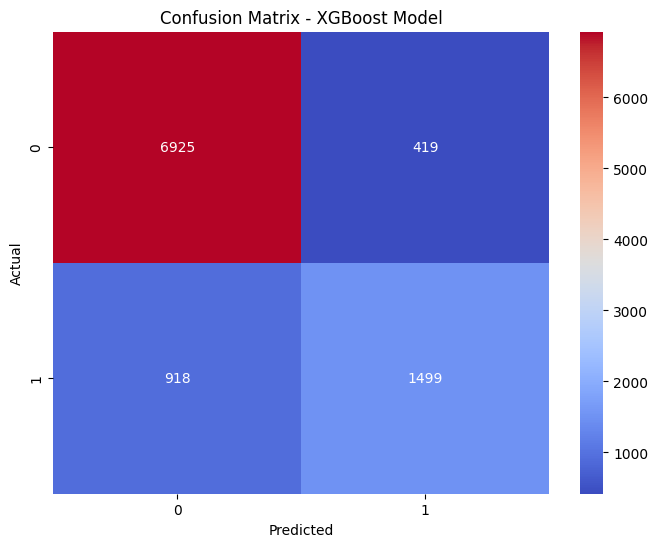

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
xgboost_conf_mat = confusion_matrix(y_test, xgboost_yprad)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgboost_conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## AUC ROC Scores and plotting ROC

In [121]:
from sklearn.metrics import roc_auc_score

models = [lr, knn, dt, rf, adb, gdboost, xgboost]

for model in models:
    y_pred_prob = model.predict_proba(X_test_imputed)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"ROC AUC score for {model.__class__.__name__}: {roc_auc}")

svm = SVC(probability=True)  # Set probability=True
svm.fit(X_train_imputed, y_train)
svm_y_pred_prob = svm.predict_proba(X_test_imputed)[:, 1]
svm_roc_auc = roc_auc_score(y_test, svm_y_pred_prob)
print(f"ROC AUC score for SVC: {svm_roc_auc}")


ROC AUC score for LogisticRegression: 0.8830128681822565
ROC AUC score for KNeighborsClassifier: 0.8691575559107015
ROC AUC score for DecisionTreeClassifier: 0.736186827509931
ROC AUC score for RandomForestClassifier: 0.8959258662091232
ROC AUC score for AdaBoostClassifier: 0.8872674931922845
ROC AUC score for GradientBoostingClassifier: 0.9105650178519439
ROC AUC score for XGBClassifier: 0.9159191362381388
ROC AUC score for SVC: 0.8668788528605025


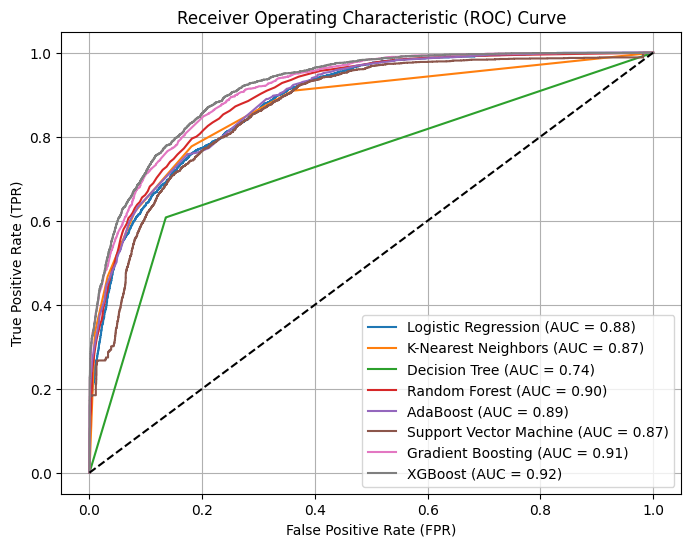

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained the classifiers and X_test_imputed is your test data

classifiers = [lr, knn, dt, rf, adb, svm, gdboost, xgboost]
labels = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest',
          'AdaBoost', 'Support Vector Machine', 'Gradient Boosting', 'XGBoost']

plt.figure(figsize=(8, 6))

for classifier, label in zip(classifiers, labels):
    if hasattr(classifier, 'predict_proba'):  # Check if the classifier supports probability estimation
        y_pred_prob = classifier.predict_proba(X_test_imputed)[:, 1]
    else:  # Use decision function for classifiers that don't support probability estimation
        y_pred_prob = classifier.decision_function(X_test_imputed)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## K Fold Validation

In [123]:
# Create a KFold object with 4 folds and shuffling
kfold = KFold(n_splits=4, shuffle=True)

# Use RandomForestClassifier for cross-validation
scores = cross_val_score(estimator=rf, X=X, y=y, cv=kfold)

# Print the scores obtained from cross-validation
print("Cross-Validation Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")
print("Mean Score:", scores.mean())


Cross-Validation Scores:
Fold 1: 0.8472
Fold 2: 0.8441
Fold 3: 0.8474
Fold 4: 0.8505
Mean Score: 0.8472983125600815


In [124]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(X)

print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,X_imputed,y,cv=5).mean())
#print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X_imputed,y,cv=5).mean())

Mean of Cross validation score for gdboost model => 0.8600849254492939


In [82]:
"""
!pip install --upgrade xgboost scikit-learn

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the XGBClassifier
xgboost_model = XGBClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4],
    'subsample': [0.5, 0.8],
    'learning_rate': [0.1],
    'min_child_weight': [1, 2],
    'random_state': [4, 5]
}

# Perform grid search
gridsearch = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5)

# Fit the model
gridsearch.fit(X_train, y_train)
"""


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [64]:
"""!pip install --upgrade xgboost
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object with 4 folds and shuffling
kfold = KFold(n_splits=4, shuffle=True)

# Perform cross-validation using the KFold object
scores = cross_val_score(estimator=model, X=X, y=y, cv=kfold)

# Print the scores obtained from cross-validation
print("Cross-Validation Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")
print("Mean Score:", scores.mean())
print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,X_imputed,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X_imputed,y,cv=5).mean())
"""

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [57]:
"""
print("Mean of Cross validation score for gdboost model","=>",cross_val_score(gdboost,X_imputed,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X_imputed,y,cv=5).mean())
"""

Mean of Cross validation score for gdboost model => 0.8595624112338335


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

## Hyperparameter Tuning

In [78]:
"""
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
xgboost.get_params().keys()  # to check the parameters
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}
parm_grid
{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

#giving above parameters to our model and behalf of this will train it again.
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)
#fit the model using given paramters
gridsearch.fit(X_train,y_train)
#traning the model now"""

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [59]:
#gridsearch.best_params_
#printing the best parameters

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [125]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)
#supplying best parameters to our model
xgboost_tuning.fit(X_train,y_train)
#train the model
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing='nan', monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1)
#predicting the values using test data
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

#printing the classification report
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7344
           1       0.80      0.59      0.67      2417

    accuracy                           0.86      9761
   macro avg       0.84      0.77      0.79      9761
weighted avg       0.85      0.86      0.85      9761

